In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import scipy.stats as sts
from scipy.stats import norm

The proportion of population whose tax returns is greater than $2000 is 0.1784262133979203
The proportion of population who owe money to the government is 0.03308713475892688
The proportion of population whose tax returns is between $100 and $700 is 0.14704908218269308


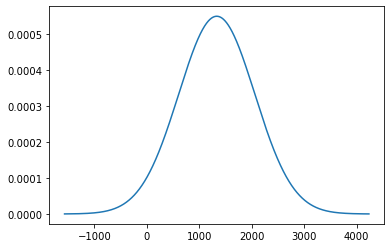

In [161]:
#task 1
m=1332
sd=725
ls=m-4*sd
us=m+4*sd
ns=np.arange(ls,us)
#a
ma=2000
z1a=(ma-m)/sd
p1a=1-norm.cdf(z1a)
print('The proportion of population whose tax returns is greater than $2000 is',p1a)
#b
mb=0
z1b=(mb-m)/sd
p1b=norm.cdf(z1b)
print('The proportion of population who owe money to the government is',p1b)
#c
mc1=100
mc2=700
z1c1=(mc1-m)/sd
p1c1=norm.cdf(z1c1)
z1c2=(mc2-m)/sd
p1c2=norm.cdf(z1c2)
p1c=p1c2-p1c1
print('The proportion of population whose tax returns is between $100 and $700 is',p1c)
plt.plot(ns,norm.pdf(ns,m,sd))

                    Sample data  Original data
mean                2219.576610    2224.317460
median              2144.000000    2195.000000
standard deviation   580.803956     564.186449
Skewness               0.711725       0.800263
Kurtosis               0.730417       0.902440


C:\Users\saiki\AppData\Local\Temp\ipykernel_2644\2745774709.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stratpcscreen=stratpcscreen.append(sampledscreen,ignore_index=True)


Text(0.5, 1.0, 'Sample Data')

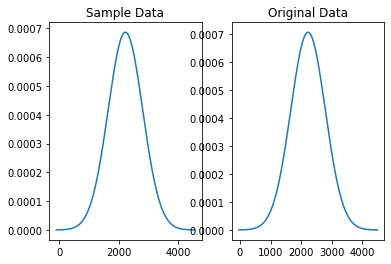

In [162]:
#task 2
pc=pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')
screenpc=pc.groupby(by=['screen'])
screen=pc.screen.unique()
stratpcscreen=pd.DataFrame()
for s in screen:
    s_data=screenpc.get_group(s)
    sampledscreen=s_data.sample(frac=0.01,replace=False,random_state=780930518)
    stratpcscreen=stratpcscreen.append(sampledscreen,ignore_index=True)
meansample=stratpcscreen['price'].mean()
mediansample=stratpcscreen['price'].median()
stdsample=stratpcscreen['price'].std()
sample=pd.Series([meansample,mediansample,stdsample,sts.skew(stratpcscreen['price'],bias=False),sts.kurtosis(stratpcscreen['price'],bias=False)],index=['mean','median','standard deviation','Skewness','Kurtosis'])
originaldata=pd.Series([pc['price'].mean(),pc['price'].median(),pc['price'].std(),sts.skew(pc['price'].tolist(),bias=False),sts.kurtosis(pc['price'].tolist(),bias=False)],index=['mean','median','standard deviation','Skewness','Kurtosis'])
centraltend=pd.DataFrame(index=['mean','median','standard deviation','Skewness','Kurtosis'])
centraltend=pd.concat([centraltend,originaldata,sample],axis=1)
centraltend.columns=['Sample data','Original data']
#b
print(centraltend)
#c,d
mpop=centraltend['Original data']['mean']
sdpop=centraltend['Original data']['standard deviation']
popls=mpop-4*sdpop
popus=mpop+4*sdpop
popns=np.arange(popls,popus)
msam=centraltend['Sample data']['mean']
sdsam=centraltend['Sample data']['standard deviation']
samls=msam-4*sdsam
samus=msam+4*sdsam
samns=np.arange(samls,samus)
fig,(d,c)=plt.subplots(1,2)
c.plot(popns,norm.pdf(popns,mpop,sdpop))
c.set_title('Original Data')
d.plot(samns,norm.pdf(samns,msam,sdsam))
d.set_title('Sample Data')


In [163]:
#task 2
#i
z2i=(4000-msam)/sdsam
p2i=norm.cdf(z2i)
print('i.The probability that the price does not exceed $4000 is',p2i)
#iii
z2iiia=(2700-msam)/sdsam
p2iiia=1-norm.cdf(z2iiia)
print('iii.a.The probability that the price is more than $2700 is',p2i)
z2iiib=(1300-msam)/sdsam
p2iiib=norm.cdf(z2iiib)
print('iii.b.The probability that the price does not exceed $1300 is',p2iiib)
z2iiic1=(2000-msam)/sdsam
p2iiic1=norm.cdf(z2iiic1)
z2iiic2=(2900-msam)/sdsam
p2iiic2=norm.cdf(z2iiic2)
p2iiic=p2iiic2-p2iiic1
print('iii.c.The probabilty that the price is between $2000 and $2900 is',p2iiic)


i.The probability that the price does not exceed $4000 is 0.9989132733164643
iii.a.The probability that the price is more than $2700 is 0.9989132733164643
iii.b.The probability that the price does not exceed $1300 is 0.056678570242722257
iii.c.The probabilty that the price is between $2000 and $2900 is 0.5266106918749119


In [159]:
#task 2
pc=pd.read_csv('DS1_C5_S5_Continuous_Practice_Computers_Data.csv')
screenpc=pc.groupby(by=['screen'])
screen=pc.screen.unique()
stratpcscreen=pd.DataFrame()
for s in screen:
    s_data=screenpc.get_group(s)
    sampledscreen=s_data.sample(frac=0.1,replace=False,random_state=780930518)
    stratpcscreen=stratpcscreen.append(sampledscreen,ignore_index=True)
price=stratpcscreen.price.unique()
pricepc=stratpcscreen.groupby(by=['price'])
stratpricescreenpc=pd.DataFrame()
for p in price:
    p_data=pricepc.get_group(p)
    sampledprice=p_data.sample(frac=0.2,replace=False,random_state=780930518)
    stratpricescreenpc=stratpricescreenpc.append(sampledprice,ignore_index=True)
meansample=stratpricescreenpc['price'].mean()
mediansample=stratpricescreenpc['price'].median()
stdsample=stratpricescreenpc['price'].std()
sample=pd.Series([meansample,mediansample,stdsample,sts.skew(stratpricescreenpc['price'],bias=False),sts.kurtosis(stratpricescreenpc['price'],bias=False)],index=['mean','median','standard deviation','Skewness','Kurtosis'])
originaldata=pd.Series([pc['price'].mean(),pc['price'].median(),pc['price'].std(),sts.skew(pc['price'].tolist(),bias=False),sts.kurtosis(pc['price'].tolist(),bias=False)],index=['mean','median','standard deviation','Skewness','Kurtosis'])
centraltend=pd.DataFrame(index=['mean','median','standard deviation','Skewness','Kurtosis'])
centraltend=pd.concat([centraltend,originaldata,sample],axis=1)
centraltend

C:\Users\saiki\AppData\Local\Temp\ipykernel_2644\1757890874.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stratpcscreen=stratpcscreen.append(sampledscreen,ignore_index=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_2644\1757890874.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stratpricescreenpc=stratpricescreenpc.append(sampledprice,ignore_index=True)


,0,1
mean,2219.576610,2149.828947
median,2144.000000,2121.500000
standard deviation,580.803956,474.520850
Skewness,0.711725,-0.002111
Kurtosis,0.730417,-0.762246
